# Business Case 

By developing a robust handwritten digit classification system, organizations can:

Improve efficiency: Automate data entry tasks, reducing manual labor and errors.
Reduce costs: Lower operational expenses associated with manual data processing.
Enhance accuracy: Minimize errors in data transcription, leading to improved decision-making.
Enable new services: Offer innovative products and services that rely on handwritten data analysis.

This project aims to develop a machine learning model capable of accurately classifying handwritten digits from 0 to 9. The model will be trained on the MNIST dataset and evaluated using standard performance metrics.

# Domain Analysis 

The domain of this project is computer vision, specifically image classification. The task involves recognizing handwritten digits, which is a fundamental problem in pattern recognition and machine learning. It has applications in various fields, including:
Optical Character Recognition (OCR): Converting handwritten text into digital form.
Document Analysis: Extracting information from handwritten documents.
Form Processing: Automating data entry from forms.
Handwriting Analysis: Studying individual handwriting patterns for forensic purposes.
The MNIST dataset, a benchmark in the field, provides a well-structured and labeled dataset of handwritten digits, making it ideal for training and evaluating classification models. Understanding the domain and its applications helps in selecting appropriate techniques and interpreting the results effectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()




In [3]:
x_train.shape

(60000, 28, 28)

### Visualize the First 24 Training Images

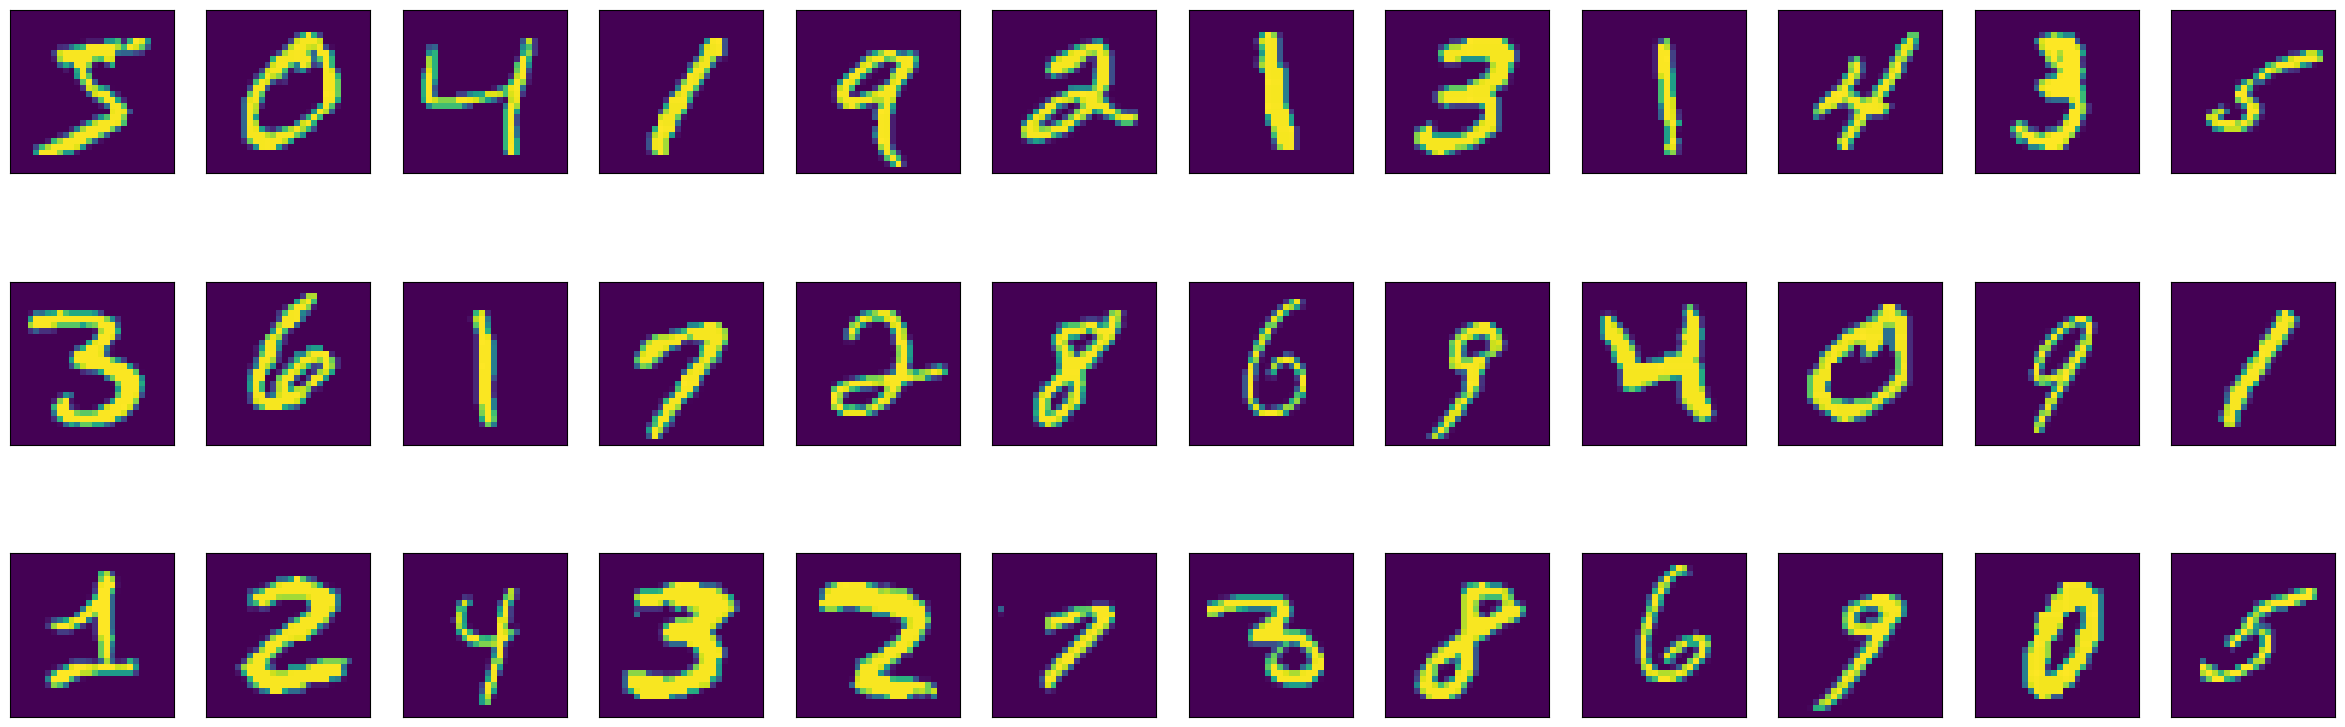

In [4]:
fig = plt.figure(figsize=(30,10))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

#### Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#### Break Dataset into Training, Testing, and Validation Sets

In [7]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

60000
60000
10000
10000


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
mnist_labels=[0,1,2,3,4,5,6,7,8,9]

In [10]:
import keras

In [11]:
from keras.utils import to_categorical
# For one hot encoder

In [12]:
# from keras.utils import np_utils

In [13]:
numlabels = len(np.unique(y_train))
numlabels

10

In [14]:
y_train= keras.utils.to_categorical(y_train, numlabels)
y_test= keras.utils.to_categorical(y_test, numlabels)
# Encoding y_train and y_test

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
x_train,x_valid=x_train[5000:],x_train[:5000]
y_train,y_valid=y_train[5000:],y_train[:5000]
# 5000 starting data will for validation group and remaining for training 

In [23]:
len(x_train)  # data for training

55000

In [22]:
len(x_test)   # data for testing

10000

In [21]:
len(x_valid)   # data for validation

5000

#### Define the Model Architecture


In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.3))  # Dropout rate between 0 and 1
model.add(Dense(500, activation='relu'))  # Hidden layer with ReLU activation
model.add(Dropout(0.4))  # Dropout rate between 0 and 1
model.add(Dense(numlabels, activation='softmax'))  # Output layer with softmax for multi-class

In [44]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 16)          │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 7, 7, 16)            │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │          72,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,670 (311.21 KB)

 Trainable params: 79,670 (311.21 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the Model

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#### Train the Model

In [46]:
# first we have to do checkpoints
from keras.callbacks import ModelCheckpoint   
# it stores the best weights for epochs

In [47]:
checkpointer = ModelCheckpoint(filepath='model.best.keras', verbose=3, save_best_only=True)

In [48]:
hist = model.fit(x_train, y_train, batch_size=28, epochs=2,validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=3, shuffle=True)

Epoch 1/2

Epoch 1: val_loss improved from inf to 0.10081, saving model to model.best.keras
Epoch 2/2

Epoch 2: val_loss improved from 0.10081 to 0.09315, saving model to model.best.keras


####  Load the Model with the Best Validation Accuracy

In [50]:
model.load_weights('model.best.keras')

#### Visualize Some Predictions

In [52]:
y_predict = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


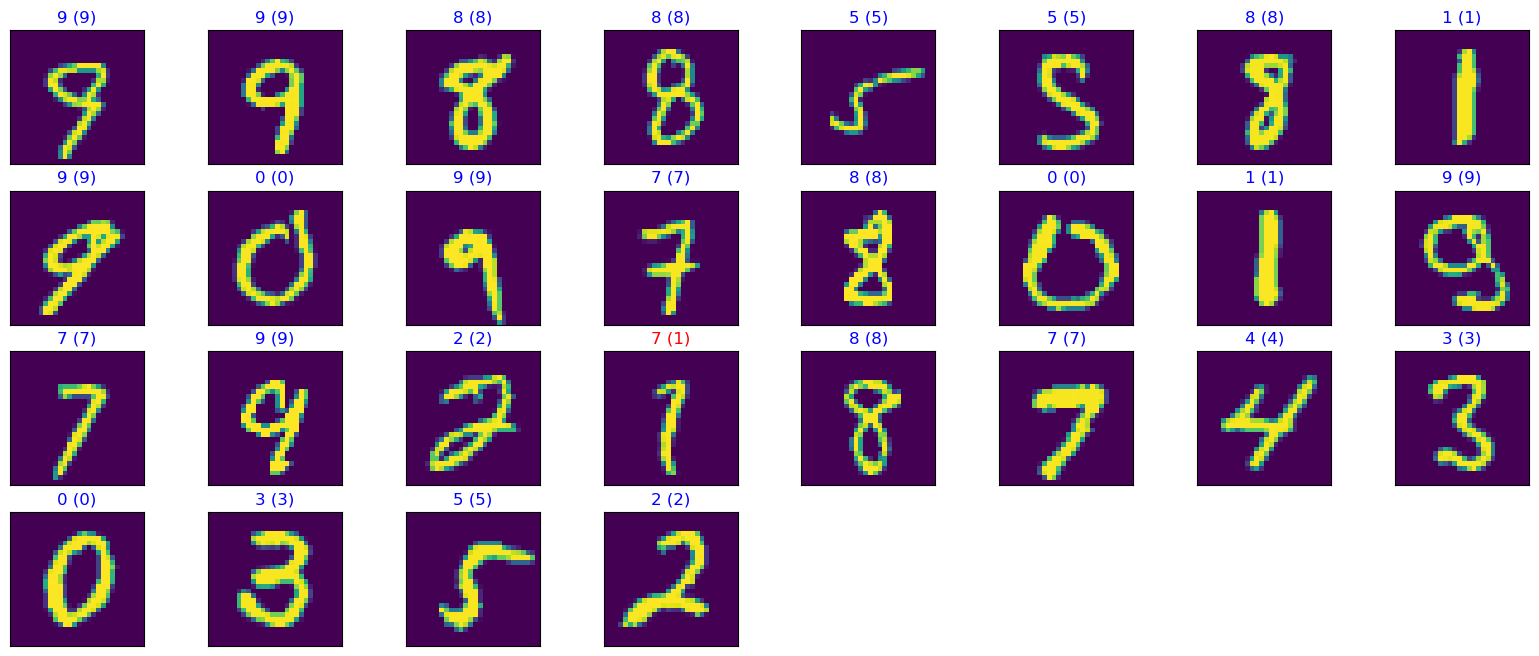

In [53]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=28, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_predict[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [56]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.07824573665857315, 0.9764999747276306]

In [57]:
accuracy = 100*score[1]
accuracy


97.64999747276306